# Isolate Census Blocks
Imports county level block feature and attribute data. Queries for blocks with > 50% black tenants, selects features associated with those blocks, and writes them to a new files. 

In [20]:
import geopandas as gpd
import pandas as pd
from datetime import datetime
%matplotlib inline

In [13]:
#Location of county level block feature class
fc_Blocks = './data/spatial/tabblock2010_37183_pophu.shp'
#Location of state level block attribute data
aff_Blocks = './data/Census/aff_download/DEC_10_PL_P1_with_ann.csv'
#Output feature class filename
fc_BlocksFiltered = fc_Blocks[:-4]+'_BlackGT50Pct.shp'
fc_BlocksFilteredMeta = fc_BlocksFiltered [:-4]+'_README.txt'

In [3]:
#Get spatial data
fc_WakeBlock = gpd.read_file(fc_Blocks)

In [8]:
#Get the attribute data
df_P10 = pd.read_csv(aff_Blocks,
                     skiprows=[1],
                     usecols=['GEO.id2','D001','D004'],
                     dtype={'GEO.id2':'str'}
                    )

In [9]:
#Isolate blocks that are >= 50% black
df_P10['PctBlack'] = df_P10.D004 / df_P10.D001
df_B50 = df_P10[df_P10['PctBlack'] > 0.5]
df_B50.shape

(1391, 4)

In [10]:
#Join to spatial features
fc_SelBlocks = pd.merge(left=fc_WakeBlock,left_on='BLOCKID10',
                        right=df_B50,right_on='GEO.id2',
                        how='right')

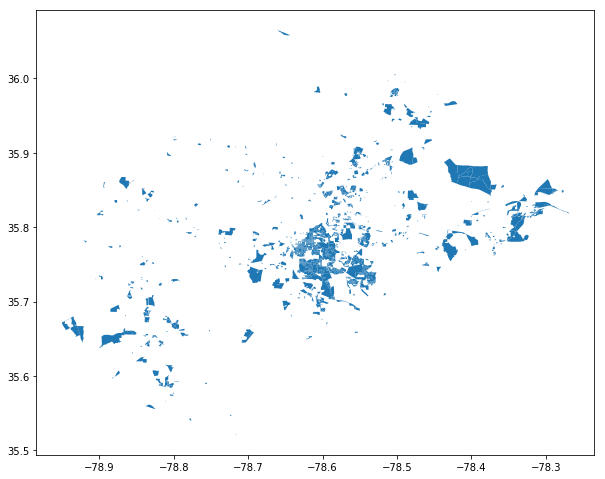

In [23]:
#View
fc_SelBlocks.plot(figsize=(10,10));

In [24]:
#Save
fc_SelBlocks.to_file(fc_BlocksFiltered,format='shapefile')
with open(fc_BlocksFiltered[:-3]+'prj','w') as outPrj:
    outPrj.write('GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]')

In [21]:
#Write metadata file
timeStamp = datetime.now().strftime("%Y-%m-%d")
with open(fc_BlocksFilteredMeta,'w') as outFN:
    outFN.write('Filtered census block data extracted from on {}'.format(timeStamp))